   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

C:\Users\Roshan\AppData\Local\Temp\ipykernel_2284\1229117497.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\Roshan\AppData\Local\Temp\ipykernel_2284\1229117497.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

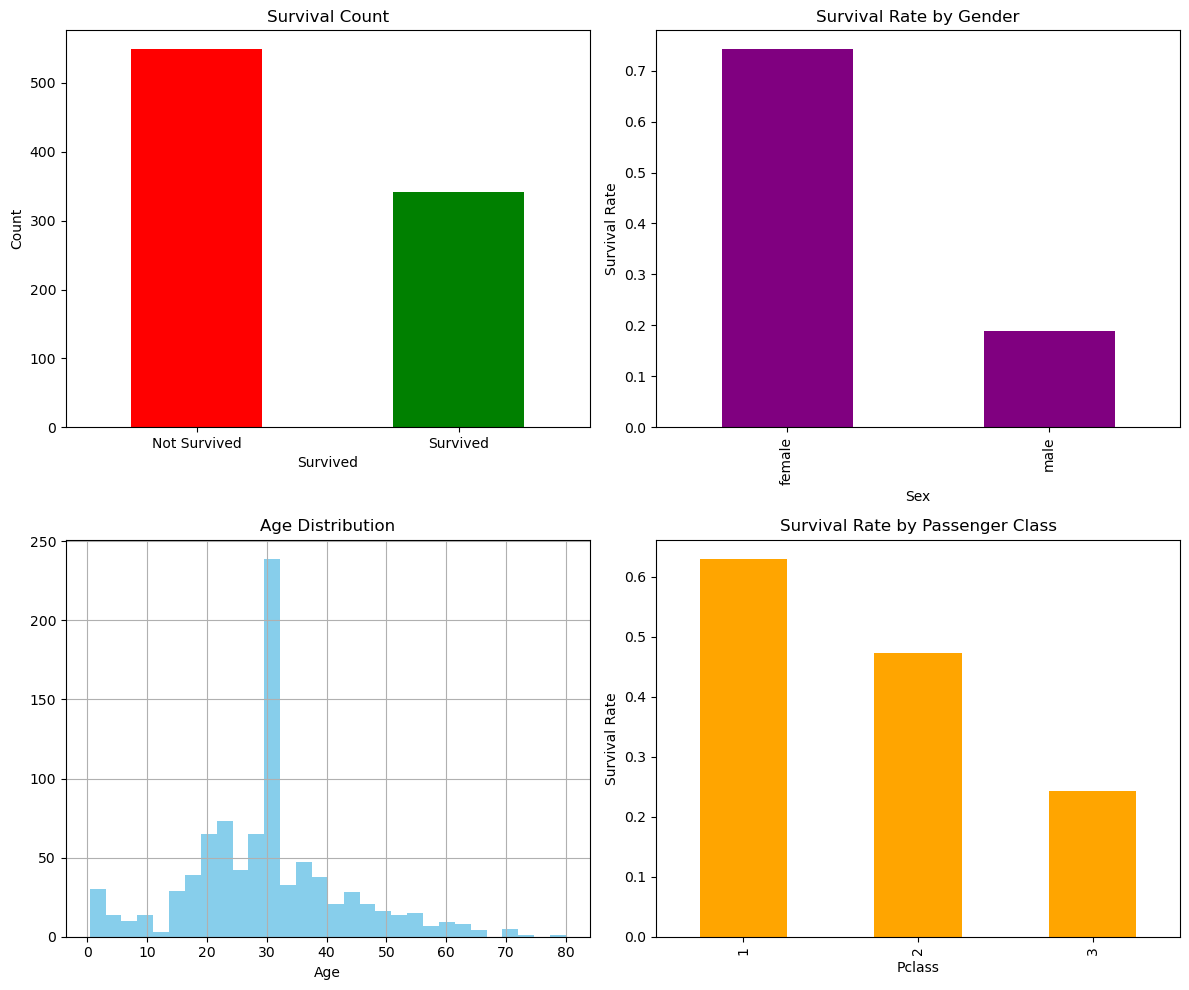

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\Roshan\Downloads\Titanic-Dataset.csv")

# Basic overview
print(df.head())
print(df.info())

# Drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Handle missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Basic Stats
print(df.describe())
print(df['Survived'].value_counts())

# --- Visualization Dashboard ---

plt.figure(figsize=(12, 10))

# 1. Survival Count
plt.subplot(2, 2, 1)
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=0)
plt.ylabel('Count')

# 2. Survival by Gender
plt.subplot(2, 2, 2)
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color='purple')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

# 3. Age Distribution
plt.subplot(2, 2, 3)
df['Age'].hist(bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# 4. Class vs Survival
plt.subplot(2, 2, 4)
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='orange')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()
